In [2]:
%matplotlib inline

# Deep Learning with Keras and TensorFlow on MNIST Data

In [3]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
# MNIST dataset is included in Keras
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.metrics import MeanSquaredError

# Model type to be used
from tensorflow.keras import Input, Sequential 

# Types of layers to be used in our model
from tensorflow.keras.layers import Dense, Dropout, Activation

# NumPy related tools
from tensorflow.keras import utils

## Loading Training and Testing Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [4]:
df = pd.read_csv("diamonds.csv")
df.drop(df.columns[0],axis = 1, inplace = True)

In [5]:
df = df[[c for c in df if c not in ['price']] + ['price']]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [6]:
encoder = LabelEncoder()
df['cut'] = encoder.fit_transform(df['cut'])
cut_mappings = {index : label for index, label in enumerate(encoder.classes_)}
df['color'] = encoder.fit_transform(df['color'])
color_mappings = {index : label for index, label in enumerate(encoder.classes_)}
df['clarity'] = encoder.fit_transform(df['clarity'])
clarity_mappings = {index : label for index, label in enumerate(encoder.classes_)}

In [46]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


In [8]:
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)

In [47]:
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train.size

339696

In [35]:
X_test.size

145584

In [36]:

X_train = X_train.reshape(433, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(185, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255


print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

ValueError: cannot reshape array of size 339696 into shape (433,28,28,1)

In [37]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.
model = Sequential()
model.add(Dense(128, input_shape=(9,))) #(784,) is not a typo -- that represents a 784 length vector!

#input layer, Dense(512 nodes, 784 length vectors), and combine with model sequential()

In [38]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu')) 
#activation layer, add a an non-linear activation function with 'Relu', negative output 0, positive value remain same

In [39]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.

# regularization technique, (lowest)20% to be dropout, such as 512 * 20% will not be passed to next layer

model.add(Dropout(0.2))   

## Adding the second hidden layer

In [16]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))

## The Final Output Layer

In [40]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(1))

In [41]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('linear')) 
# or
#model.add(Activation('sigmoid')) 

In [42]:
# Summarize the built model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1280      
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Let's use the Adam optimizer for learning 
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(
    optimizer='sgd',
    loss='mse')



In [21]:
%%time
# batch_size is X2 number, 2, 4, 8 16...etc... small batch size help to find global minimum.
# model.fit(X_train, Y_train,
#           batch_size=128, epochs=5,  
#           verbose=1)

history = model.fit(X_train, 
                    y_train, 
                    batch_size = 128,
                    epochs= 3, 
                    validation_split= 0.1, 
                    verbose=1)

Epoch 1/3
266/266 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/3
266/266 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/3
266/266 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Wall time: 3.8 s


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

## Evaluate Model's Accuracy on Test Data

In [28]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

506/506 [==============================] - 0s 604us/step - loss: nan


TypeError: 'float' object is not subscriptable

In [23]:
X_test[0]

array([-1.02798729,  0.43263486, -0.35220021, -1.64425249, -0.66128068,
        0.69339963, -1.22347292, -1.17364017, -1.26879511])

In [24]:
model.predict(X_test[0:2])

array([[nan],
       [nan]], dtype=float32)

KeyError: 'accuracy'

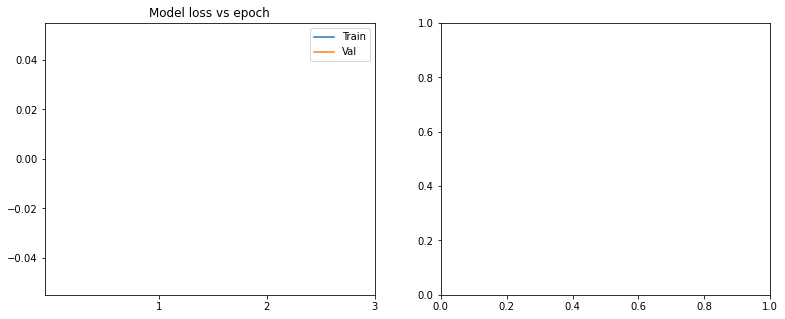

In [25]:
epoch_range = range(1, len(history.history['loss']) + 1)
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title("Model loss vs epoch")
plt.xticks(epoch_range)
plt.legend(['Train', 'Val'])

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title("Model accuracy vs epoch")
plt.xticks(epoch_range)
plt.legend(['Train', 'Val'])

In [61]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_test, axis=-1), model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [62]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

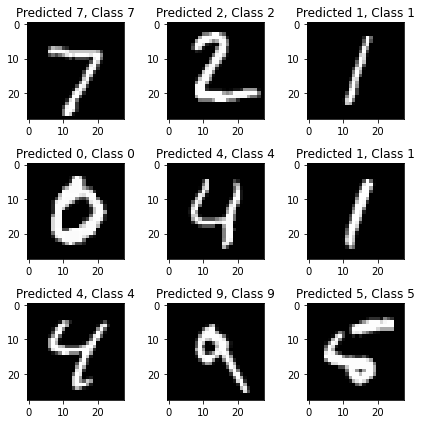

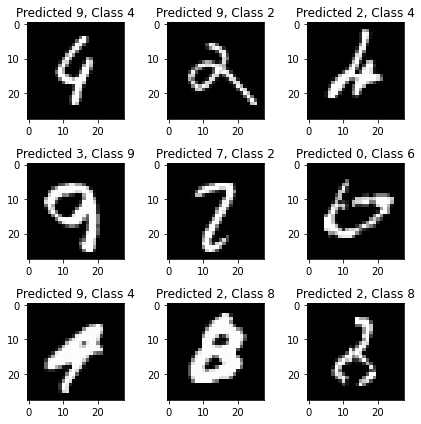

In [20]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

# Trying experimenting with the batch size!

#### How does increasing the batch size to 10,000 affect the training time and test accuracy?

#### How about a batch size of 32?

In [21]:
model_10000 = Sequential()
model_10000.add(Input(shape=(784,)))
model_10000.add(Dense(512))
model_10000.add(Activation('relu'))
model_10000.add(Dropout(0.2))
model_10000.add(Dense(512))
model_10000.add(Activation('relu'))
model_10000.add(Dropout(0.2))
model_10000.add(Dense(10))
model_10000.add(Activation('softmax')) 

model_10000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_10000.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [22]:
%%time
# Training the same model architecture with a large batch size of 10000
history = model_10000.fit(X_train, 
                          Y_train, 
                          batch_size = 10000,
                          epochs= 5, 
                          validation_split= 0.1, 
                          verbose=1)

Epoch 1/5
6/6 [==============================] - 2s 325ms/step - loss: 1.7110 - accuracy: 0.5399 - val_loss: 0.6960 - val_accuracy: 0.8617
Epoch 2/5
6/6 [==============================] - 2s 288ms/step - loss: 0.6395 - accuracy: 0.8190 - val_loss: 0.3247 - val_accuracy: 0.9042
Epoch 3/5
6/6 [==============================] - 2s 268ms/step - loss: 0.4418 - accuracy: 0.8670 - val_loss: 0.2568 - val_accuracy: 0.9260
Epoch 4/5
6/6 [==============================] - 2s 252ms/step - loss: 0.3718 - accuracy: 0.8911 - val_loss: 0.2175 - val_accuracy: 0.9365
Epoch 5/5
6/6 [==============================] - 1s 243ms/step - loss: 0.3102 - accuracy: 0.9107 - val_loss: 0.1885 - val_accuracy: 0.9448
Wall time: 10.6 s


In [23]:
score = model_10000.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2339 - accuracy: 0.9321
Test loss: 0.23387902975082397
Test accuracy: 0.9320999979972839


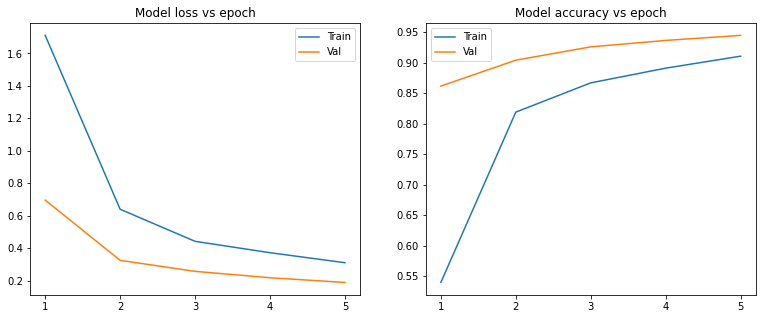

In [24]:
epoch_range = range(1, len(history.history['loss']) + 1)
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title("Model loss vs epoch")
plt.xticks(epoch_range)
plt.legend(['Train', 'Val'])

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title("Model accuracy vs epoch")
plt.xticks(epoch_range)
plt.legend(['Train', 'Val'])

In [25]:
model_32 = Sequential()
model_32.add(Input(shape=(784,)))
model_32.add(Dense(512))
model_32.add(Activation('relu'))
model_32.add(Dropout(0.2))
model_32.add(Dense(512))
model_32.add(Activation('relu'))
model_32.add(Dropout(0.2))
model_32.add(Dense(10))
model_32.add(Activation('softmax')) 

model_32.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_32.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [26]:
%%time
# Training the same model architecture with a small batch size of 32
history = model_32.fit(X_train, 
                       Y_train, 
                       batch_size = 32,
                       epochs= 5, 
                       validation_split= 0.1, 
                       verbose=1)

Epoch 1/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2258 - accuracy: 0.9295 - val_loss: 0.0841 - val_accuracy: 0.9758
Epoch 2/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1090 - accuracy: 0.9661 - val_loss: 0.0850 - val_accuracy: 0.9742
Epoch 3/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0856 - accuracy: 0.9734 - val_loss: 0.0714 - val_accuracy: 0.9807
Epoch 4/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0667 - accuracy: 0.9789 - val_loss: 0.0586 - val_accuracy: 0.9837
Epoch 5/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0778 - val_accuracy: 0.9797
Wall time: 57.6 s


In [27]:
score = model_32.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0730 - accuracy: 0.9791: 0s - loss: 0.0760 - accuracy: 
Test loss: 0.07296740263700485
Test accuracy: 0.9790999889373779


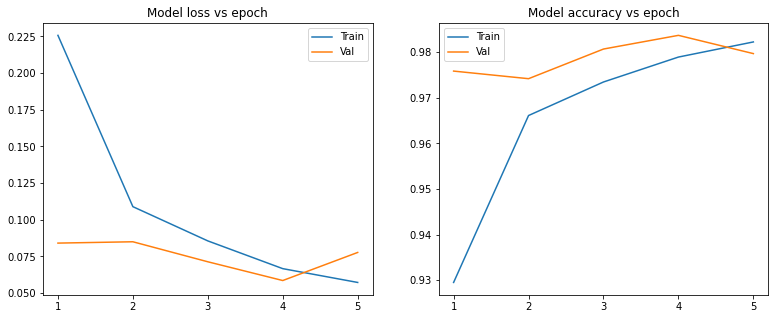

In [28]:
epoch_range = range(1, len(history.history['loss']) + 1)
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title("Model loss vs epoch")
plt.xticks(epoch_range)
plt.legend(['Train', 'Val'])

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title("Model accuracy vs epoch")
plt.xticks(epoch_range)
plt.legend(['Train', 'Val'])

# Experimenting and evaluating multiple model achitectures

We shall train below models with batch size of 128 for 10 epochs each.

#### Model 1: Two hidden layers of 512 nodes
#### Model 2: Two hidden layers - 1st layer has 512 nodes, 2nd layer has 256 nodes
#### Model 3: Three hidden layers - 1st layer (256 nodes), 2nd layer (128 nodes), 3rd layer (64 nodes)

In [29]:
import time

In [30]:
model1 = Sequential()
model1.add(Input(shape=(784,)))
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10))
model1.add(Activation('softmax')) 

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [31]:
model2 = Sequential()
model2.add(Input(shape=(784,)))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax')) 

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_13 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [32]:
model3 = Sequential()
model3.add(Input(shape=(784,)))
model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10))
model3.add(Activation('softmax')) 

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [33]:
%%time
start = time.time()
history1= model1.fit(X_train, 
                     Y_train, 
                     batch_size = 128,
                     epochs= 10, 
                     validation_split= 0.1, 
                     verbose=1)
end = time.time()
timespent1 = end-start

Epoch 1/10
422/422 [==============================] - 4s 10ms/step - loss: 0.2633 - accuracy: 0.9208 - val_loss: 0.1036 - val_accuracy: 0.9707
Epoch 2/10
422/422 [==============================] - 4s 10ms/step - loss: 0.1054 - accuracy: 0.9674 - val_loss: 0.0768 - val_accuracy: 0.9770
Epoch 3/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0752 - accuracy: 0.9763 - val_loss: 0.0785 - val_accuracy: 0.9780
Epoch 4/10
422/422 [==============================] - 4s 11ms/step - loss: 0.0590 - accuracy: 0.9811 - val_loss: 0.0775 - val_accuracy: 0.9770
Epoch 5/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.0621 - val_accuracy: 0.9813
Epoch 6/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0611 - val_accuracy: 0.9832
Epoch 7/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0368 - accuracy: 0.9876 - val_loss: 0.0798 - val_accuracy: 0.9788

In [34]:
%%time
start = time.time()
history2 = model2.fit(X_train, 
                     Y_train, 
                     batch_size = 128,
                     epochs= 10, 
                     validation_split= 0.1, 
                     verbose=1)
end = time.time()
timespent2 = end-start

Epoch 1/10
422/422 [==============================] - 3s 8ms/step - loss: 0.2791 - accuracy: 0.9174 - val_loss: 0.0984 - val_accuracy: 0.9702
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1140 - accuracy: 0.9651 - val_loss: 0.0812 - val_accuracy: 0.9752
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0779 - accuracy: 0.9757 - val_loss: 0.0696 - val_accuracy: 0.9805
Epoch 4/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0618 - accuracy: 0.9804 - val_loss: 0.0708 - val_accuracy: 0.9810
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0742 - val_accuracy: 0.9800
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0716 - val_accuracy: 0.9792
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0716 - val_accuracy: 0.9823
Epoch 

In [35]:
%%time
start = time.time()
history3 = model3.fit(X_train, 
                     Y_train, 
                     batch_size = 128,
                     epochs= 10, 
                     validation_split= 0.1, 
                     verbose=1)
end = time.time()
timespent3 = end-start

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4296 - accuracy: 0.8694 - val_loss: 0.1213 - val_accuracy: 0.9628
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1714 - accuracy: 0.9497 - val_loss: 0.0893 - val_accuracy: 0.9735
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1249 - accuracy: 0.9631 - val_loss: 0.0769 - val_accuracy: 0.9772
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1011 - accuracy: 0.9699 - val_loss: 0.0753 - val_accuracy: 0.9773
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0847 - accuracy: 0.9749 - val_loss: 0.0687 - val_accuracy: 0.9795
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0742 - accuracy: 0.9775 - val_loss: 0.0688 - val_accuracy: 0.9792
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0669 - accuracy: 0.9798 - val_loss: 0.0619 - val_accuracy: 0.9810
Epoch 

In [36]:
models = [model1 ,model2, model3]
histories = [history1, history2, history3]
timespent = [timespent1, timespent2, timespent3]

In [37]:
metric1 = model1.metrics_names[0]
metric2 = model1.metrics_names[1]

for i, (model, time) in enumerate(list(zip(models, timespent)), start=1):
    score = model.evaluate(X_test, Y_test, verbose=0)
    print("Model {}: {} = {:.2%}, {} = {:.2%}, time to train = {:.0f} secs".
          format(i, metric1, score[0], metric2, score[1], time))

Model 1: loss = 8.00%, accuracy = 97.91%, time to train = 46 secs
Model 2: loss = 7.32%, accuracy = 98.14%, time to train = 32 secs
Model 3: loss = 7.47%, accuracy = 97.93%, time to train = 18 secs


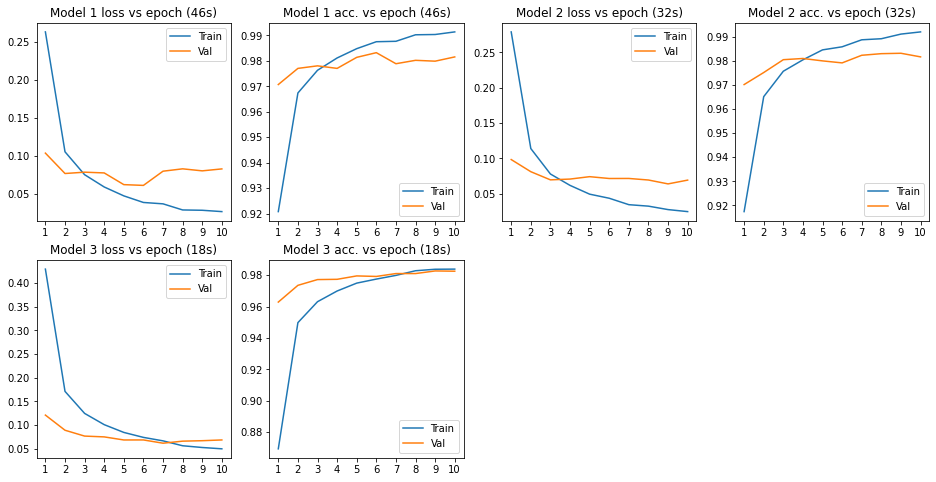

In [40]:
plt.subplots(figsize=(16,8))
for i, history in enumerate(histories, start=1):
    epoch_range = range(1, len(history.history['loss']) + 1)

    plt.subplot(2, 4, i*2 - 1)
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title(f"Model {i} loss vs epoch ({timespent[i-1]:.0f}s)")
    plt.xticks(epoch_range)
    plt.legend(['Train', 'Val'])

    plt.subplot(2, 4, i*2)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title(f"Model {i} acc. vs epoch ({timespent[i-1]:.0f}s)")
    plt.xticks(epoch_range)
    plt.legend(['Train', 'Val'])